<a href="https://colab.research.google.com/github/abuzarbagewadi/AutoEncoders/blob/master/AutoEncoderusingKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from random import randint 
from keras import backend as K 
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D 
from keras.models import Model 
from keras.datasets import mnist 
from keras.callbacks import TensorBoard 

Using TensorFlow backend.


### Loading the Data

In [4]:
def load_data(): 
    
    input_image = Input(shape =(28, 28, 1)) 
    (X_train, _), (X_test, _) = mnist.load_data() 
       
    X_train = X_train.astype('float32') / 255.
    X_train = np.reshape(X_train, (len(X_train), 28, 28, 1)) 
    X_test = X_test.astype('float32') / 255.
    X_test = np.reshape(X_test, (len(X_test), 28, 28, 1)) 
      
    return X_train, X_test, input_image

### Building the Neural Network

In [5]:
def build_network(input_image): 
      
     
    x = Conv2D(16, (3, 3), activation ='relu', padding ='same')(input_image) 
    x = MaxPooling2D((2, 2), padding ='same')(x)  
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x) 
    x = MaxPooling2D((2, 2), padding ='same')(x) 
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x) 
    encoded_layer = MaxPooling2D((2, 2), padding ='same')(x) 
       
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(encoded_layer) 
    x = UpSampling2D((2, 2))(x) 
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x) 
    x = UpSampling2D((2, 2))(x) 
    x = Conv2D(16, (3, 3), activation ='relu')(x) 
    x = UpSampling2D((2, 2))(x) 
    decoded_layer = Conv2D(1, (3, 3), activation ='sigmoid', padding ='same')(x) 
      
    return decoded_layer 

### Training the Neural Network

In [15]:
def build_auto_encoder_model(X_train, X_test, input_image, decoded_layer): 
      
     
    autoencoder = Model(input_image, decoded_layer) 
    autoencoder.compile(optimizer ='adam', loss ='binary_crossentropy') 
      
     
    autoencoder.fit(X_train, X_train, 
                epochs = 15, 
                batch_size = 256, 
                shuffle = True, 
                validation_data =(X_test, X_test), 
                callbacks =[TensorBoard(log_dir ='/tmp / autoencoder')])
         
      
    return autoencoder 

### Visualising the Reconstruction

In [16]:
def visualize(model, X_test): 
      
    # Reconstructing the encoded images 
    reconstructed_images = model.predict(X_test) 
      
    plt.figure(figsize =(20, 4)) 
    for i in range(1, 11): 
          
        # Generating a random to get random results 
        rand_num = randint(0, 10001) 
      
        # To display the original image 
        ax = plt.subplot(2, 10, i) 
        plt.imshow(X_test[rand_num].reshape(28, 28)) 
        plt.gray() 
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False) 
  
        # To display the reconstructed image 
        ax = plt.subplot(2, 10, i + 10) 
        plt.imshow(reconstructed_images[rand_num].reshape(28, 28)) 
        plt.gray() 
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False) 
          
    # Displaying the plot 
    plt.show() 

### Function Calling

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 93us/step - loss: 0.2785 - val_loss: 0.1735
Epoch 2/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.1587 - val_loss: 0.1462
Epoch 3/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.1404 - val_loss: 0.1329
Epoch 4/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.1302 - val_loss: 0.1256
Epoch 5/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.1243 - val_loss: 0.1210
Epoch 6/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.1204 - val_loss: 0.1175
Epoch 7/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.1175 - val_loss: 0.1148
Epoch 8/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.1152 - val_loss: 0.1130
Epoch 9/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.1133 - val_loss: 0.1112
Epoch

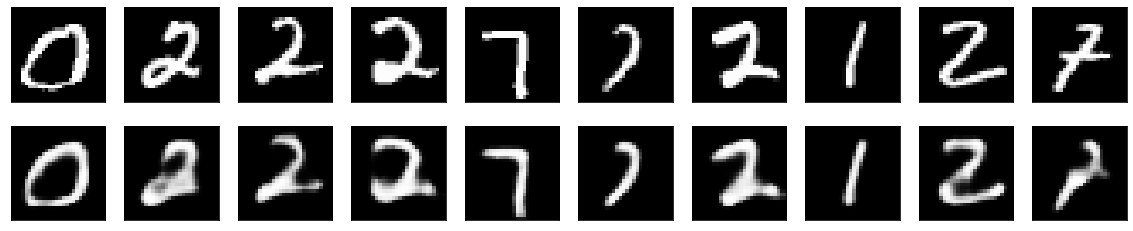

In [17]:
X_train, X_test, input_image = load_data() 
decoded_layer = build_network(input_image) 
auto_encoder_model = build_auto_encoder_model(X_train, X_test, input_image, decoded_layer) 
visualize(auto_encoder_model, X_test) 


